<a href="https://colab.research.google.com/github/AkhmadRamadani/PCVK_GENAP_2023/blob/main/Week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BIODATA

> **Akhmad Ramadani**

> TI-3B 

> 2041720002


In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np
import math
from PIL import Image as im

## Fungsi Konvolusi
Fungsi convolution2d ini memiliki 4 parameter yaitu image, kernel, stride, dan padding.

1. image : matriks gambar 2 dimensi yang akan diolah oleh kernel dengan operasi konvolusi
2. kernel : matriks filter 2 dimensi yang digunakan untuk memproses gambar input, dimana ukuran kernel biasanya lebih kecil daripada gambar input
3. stride : bilangan bulat yang menunjukkan jumlah piksel yang diabaikan antara filter saat bergerak di sepanjang gambar input
4. padding : bilangan bulat yang menunjukkan jumlah piksel yang ditambahkan ke tepi gambar input sebelum melakukan operasi konvolusi dengan filter

In [14]:
def convolution2d(image, kernel, stride = 1, padding = 0):
  image = np.pad(image, padding, mode='constant', constant_values=0)

  kernel_height, kernel_width = kernel.shape
  padded_height, padded_width = image.shape

  output_height = (padded_height - kernel_height) // stride + 1
  output_width = (padded_width - kernel_width) // stride + 1

  image_result = np.zeros((output_height, output_width)).astype(np.float32)

  for y in range(0, output_height):
    for x in range(0, output_width):
      image_result[y][x] = np.sum(image[y * stride:y * stride + kernel_height, x * stride:x * stride + kernel_width] * kernel).astype(np.float32)

  return image_result

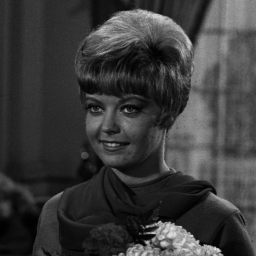

In [30]:
img1 = cv.imread('/content/drive/MyDrive/Semester 6/PCVK/Images/female.tiff')
img1_gray = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
cv2_imshow(img1_gray)

### Sharpen
Di bawah ini adalah teknik untuk menajamkan citra menggunakan kernel


```
sharpener_kernel = np.array(
    [
        [0, -1, 0],
        [-1, 5, -1],
        [0, -1, 0],
    ]
)
```



In [21]:
sharpener_kernel = np.array(
    [
        [0, -1, 0],
        [-1, 5, -1],
        [0, -1, 0],
    ]
)

In [27]:
sharpened_image = convolution2d(img1_gray, sharpener_kernel, padding=1)

(256, 256)

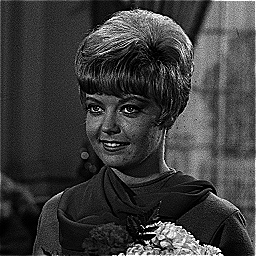

In [29]:
cv2_imshow(sharpened_image)

### Emboss
Di bawah ini adalah teknik untuk menghasilkan efek timbul pada citra menggunakan kernel


```
embosser_kernel = np.array(
    [
        [-2,-1, 0],
        [-1, 1, 1],
        [ 0, 1, 2]
    ]
)
```



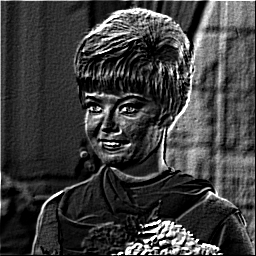

In [37]:
embosser_kernel = np.array(
    [
        [-2,-1, 0],
        [-1, 1, 1],
        [ 0, 1, 2]
    ]
)
embossed_image = convolution2d(img1_gray, embosser_kernel, padding=1)
cv2_imshow(embossed_image)

### Edge Detection
Edge detection digunakan untuk mengetahui garis-garis yang membentuk objek. Pada kali ini terdapat 3 kernel untuk membuat edge detection, yaitu:


#### Left Sobel Edge Detection


```
left_sobel_edge_detector_kernel = np.array(
    [
        [1, 0, -1],
        [2, 0, -2],
        [1, 0, -1]
    ]
  )
```



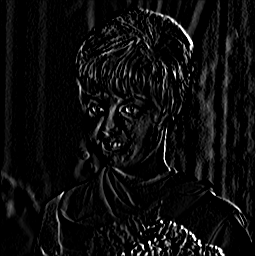

In [36]:
left_sobel_edge_detector_kernel = np.array(
    [
        [1, 0, -1],
        [2, 0, -2],
        [1, 0, -1]
    ]
  )

edge_detection_img = convolution2d(img1_gray, left_sobel_edge_detector_kernel, padding=1)
cv2_imshow(edge_detection_img)

#### Canny Edge Detection


```
canny_edge_detector_kernel = np.array(
    [
        [-1,-1,-1],
        [-1, 8,-1],
        [-1,-1,-1]
    ]
)

```



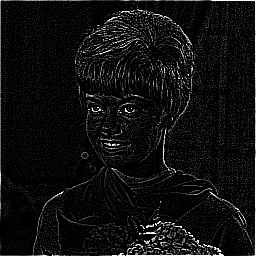

In [40]:
canny_edge_detector_kernel = np.array(
    [
        [-1,-1,-1],
        [-1, 8,-1],
        [-1,-1,-1]
    ]
)

canny_edge_detection_img = convolution2d(img1_gray, canny_edge_detector_kernel, padding=1)
cv2_imshow(canny_edge_detection_img)

#### Prewit Edge Detection


```
prewit_edge_detector_kernel = np.array(
    [
        [-1,-1,-1],
        [ 0, 0, 0],
        [ 1, 1, 1]
    ]
)
```



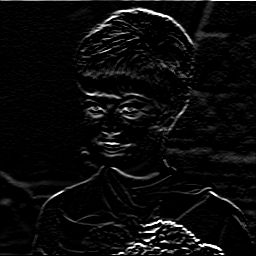

In [41]:
prewit_edge_detector_kernel = np.array(
    [
        [-1,-1,-1],
        [ 0, 0, 0],
        [ 1, 1, 1]
    ]
)

prewit_edge_detection_img = convolution2d(img1_gray, prewit_edge_detector_kernel, padding=1)
cv2_imshow(prewit_edge_detection_img)

### Gaussian Blur
Digunakan untuk mengurangi noise atau gangguan pada gambar dan juga untuk membuat gambar menjadi lebih halus atau terlihat lebih smooth.

Pada kali ini menggunakan 2 kernel gaussian blur yaitu:

#### Gaussian Blur 5x5


```
gaussian_blur_5 = np.array(
    [
        [1/256, 4/256, 6/256, 4/256, 1/256],
        [4/256, 16/256, 24/256, 16/256, 4/256],
        [6/256, 24/256, 36/256, 24/256, 6/256],
        [4/256, 16/256, 24/256, 16/256, 4/256],
        [1/256, 4/256, 6/256, 4/256, 1/256]
    ]
)
```



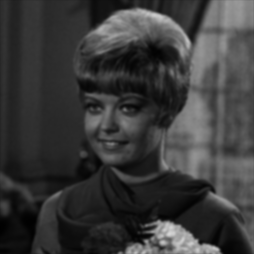

In [43]:
gaussian_blur_5 = np.array(
    [
        [1/256, 4/256, 6/256, 4/256, 1/256],
        [4/256, 16/256, 24/256, 16/256, 4/256],
        [6/256, 24/256, 36/256, 24/256, 6/256],
        [4/256, 16/256, 24/256, 16/256, 4/256],
        [1/256, 4/256, 6/256, 4/256, 1/256]
    ]
)

gaussian_blur_img = convolution2d(img1_gray, gaussian_blur_5, padding=1)
cv2_imshow(gaussian_blur_img)

#### Gaussian Blur 21*21
Pada gaussian blur 21*21 ini kita menggenerate kernel menggunakan kode di bawah ini

```
kernel_size = 21
sigma = math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
kernel_gaussian = gaussian_kernel @ gaussian_kernel.transpose()
```


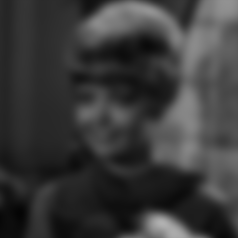

In [44]:
kernel_size = 21
sigma = math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
kernel_gaussian = gaussian_kernel @ gaussian_kernel.transpose()


gaussian_blur_21_img = convolution2d(img1_gray, kernel_gaussian, padding=1)
cv2_imshow(gaussian_blur_21_img)